In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Начнём с простого (скалярного) случая — частные производные

Пусть у нас простая линейная модель с двумя коэффициентами (свободный член + один признак)
$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i,\qquad i=1,\dots,n.
$$
Цель — минимизировать сумма квадратов ошибок
$$
S(\beta_0,\beta_1)=\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.
$$

Берём частные производные и приравниваем к нулю.

1. По ($\beta_0$):
   $$
   \frac{\partial S}{\partial\beta_0} = -2\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) = 0
   \quad\Rightarrow\quad n\beta_0 + \beta_1\sum_{i} x_i = \sum_{i} y_i.
   $$

2. По ($\beta_1$):
   $$
   \frac{\partial S}{\partial\beta_1} = -2\sum_{i=1}^n x_i (y_i - \beta_0 - \beta_1 x_i) = 0
   \quad\Rightarrow\quad \beta_0\sum_{i} x_i + \beta_1\sum_{i} x_i^2 = \sum_{i} x_i y_i.
   $$

Итого получается система двух линейных уравнений:
$$
\begin{cases}
n\beta_0 + \beta_1\sum x_i = \sum y_i,\\
\beta_0\sum x_i + \beta_1\sum x_i^2 = \sum x_i y_i.
\end{cases}
$$


Решая эту систему (например, выражая ($\beta_0$) через ($\beta_1$) или подставляя средние), получаем классические скалярные формулы:
$$
\beta_1 = \dfrac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2},\qquad
\beta_0 = \bar y - \beta_1 \bar x.
$$

Это — наглядный аналитический вывод для одномерного случая.

Истинные коэффициенты: β0 = 5, β1 = 3
Оценённые коэффициенты: β0 = 5.129, β1 = 2.884


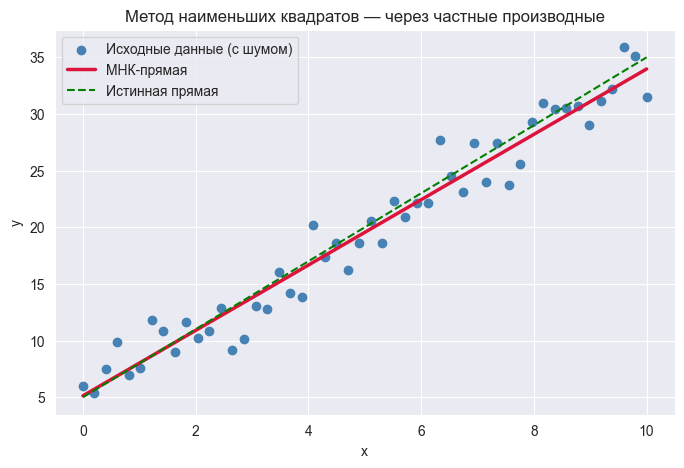

In [14]:
# === 1. Генерация данных ===
np.random.seed(42)  # чтобы каждый раз получались одинаковые данные

# Настоящие коэффициенты
true_beta0 = 5
true_beta1 = 3

# === Создаем данные ===
X = np.linspace(0, 10, 50)                      # равномерно от 0 до 10
noise = np.random.normal(0, 2, size=len(x))     # нормальный шум
y = true_beta0 + true_beta1 * x + noise         # линейная зависимость + шум

# === 2. Метод наименьших квадратов (через частные производные) ===
class LeastSquares:
    def __init__(self,feather_array,target_array):
        # self.X = np.ravel(feather_array) for 2 dimension
        """
            Простая линейная регрессия методом наименьших квадратов (OLS).
        """
        self.X = feather_array
        self.y = target_array
        self.n = feather_array.shape[0]
        self.beta0 = None
        self.beta1 = None


    def fit(self):
        sum_x = np.sum(self.X)
        sum_y = np.sum(self.y)
        sum_xy = np.sum(self.X * self.y)
        sum_x2 = np.sum(self.X**2)

        A = np.array([
            [self.n,sum_x],
            [sum_x,sum_x2],
        ])
        B = np.array([
            sum_y,
            sum_xy,
        ])

        # === alternative ===
        # beta = np.linalg.inv(A) @ B
        # self.beta0, self.beta1 = beta

        self.beta0,self.beta1 = np.linalg.solve(A,B)
        return self

    def show_coefficient(self):
        print(f"Оценённые коэффициенты: β0 = {self.beta0:.3f}, β1 = {self.beta1:.3f}")


    def predict(self, X_new):
        if self.beta0 is None or self.beta1 is None:
            raise ValueError("Сначала вызови .fit() перед predict()")
        return self.beta0 + self.beta1 * X_new

# === 3. Предсказания ===
model = LeastSquares(feather_array=X,target_array=y).fit()

print(f"Истинные коэффициенты: β0 = {true_beta0}, β1 = {true_beta1}")
model.show_coefficient()

y_pred = model.predict(X_new=X)


# === 4. Визуализация ===
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='steelblue', label='Исходные данные (с шумом)')
plt.plot(x, y_pred, color='crimson', linewidth=2.5, label='МНК-прямая')
plt.plot(x, true_beta0 + true_beta1*x, '--', color='green', label='Истинная прямая')

plt.title("Метод наименьших квадратов — через частные производные")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# 2. Общий случай (мультирегрессия) — вывод через линейную алгебру (нормальные уравнения)

Обозначения:

* ($\mathbf{y}\in\mathbb{R}^n$) — вектор ответов,
* ($\mathbf{X}\in\mathbb{R}^{n\times p}$) — матрица признаков (включая столбец единиц для свободного члена),
* ($\boldsymbol{\beta}\in\mathbb{R}^p$) — вектор коэффициентов,
* модель: ($\mathbf{y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}$).

Функция ошибки (квадрат нормы вектора остатков):
$
S(\boldsymbol{\beta}) = |\mathbf{y} - \mathbf{X}\boldsymbol{\beta}|^2
= (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^T(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}).
$

Вычислим градиент (вектор частных производных по компонентам ($\boldsymbol{\beta}$)). Правило:
$$
\frac{\partial}{\partial\boldsymbol{\beta}} |\mathbf{y}-\mathbf{X}\boldsymbol{\beta}|^2
= -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}).
$$

Приравниваем к нулю:
$$
-2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}) = 0
\quad\Rightarrow\quad
\mathbf{X}^T\mathbf{X},\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}.
$$

Это и есть **нормальные уравнения**. Если матрица ($\mathbf{X}^T\mathbf{X}$) невырождена (обратима), то явное решение:
$$
\boxed{\ \boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\ }.
$$

**Важно:** условие обратимости эквивалентно тому, что столбцы ($X$) линейно независимы (полный ранг ($p$)). Если ($X^T X$) сингулярна (коллинеарность), то прямое обращение невозможно — подробно ниже.


Истинные коэффициенты: [ 3.   2.  -1.5]
Оценённые коэффициенты: [ 2.102  1.932 -1.356]


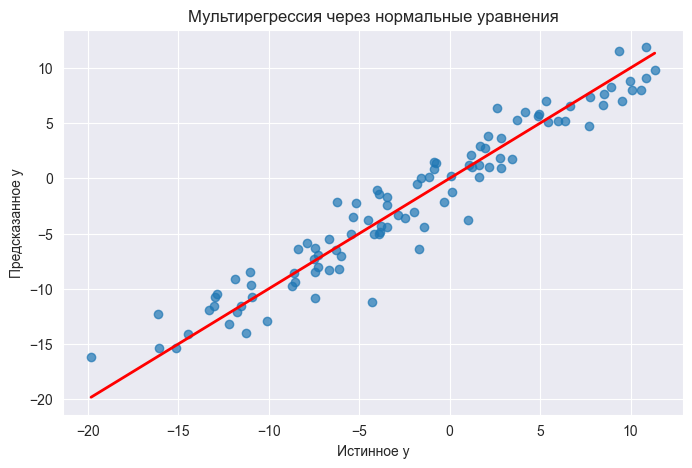

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Синтетические данные ===
np.random.seed(42)
n = 100
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(5, 15, n)

# Истинные коэффициенты
beta_true = np.array([3.0, 2.0, -1.5])  # β0, β1, β2

# Матрица X с единичным столбцом (для свободного члена)
X = np.column_stack([np.ones(n), X1, X2])
# Целевая переменная: y = Xβ + шум
noise = np.random.normal(0, 2, n)
y = X @ beta_true + noise

# === 2. Оценка β через нормальные уравнения ===
# Формула: β = (X^T X)^(-1) X^T y
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("Истинные коэффициенты:", beta_true)
print("Оценённые коэффициенты:", beta_hat.round(3))

# === 3. Прогноз ===
y_pred = X @ beta_hat

# === 4. Визуализация ===
fig = plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Истинное y")
plt.ylabel("Предсказанное y")
plt.title("Мультирегрессия через нормальные уравнения")
plt.grid(True)
plt.show()



# 3. Геометрический (проекционный) вывод — ортогональная проекция

Геометрическая интерпретация объясняет, *почему* нормальное уравнение имеет тот смысл, который мы хотим.

* Столбцы матрицы ($\mathbf{X}$) порождают подпространство ($ \mathcal{C}(\mathbf{X}) = { \mathbf{X} \mathbf{b} : \mathbf{b}\in\mathbb{R}^p }$) в ($\mathbb{R}^n$).
* Мы хотим найти точку ($\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$) в этом подпространстве, **ближайшую** к ($\mathbf{y}$) в евклидовой норме: минимизируем ($|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}|$).
* Условие ближайшей точки: вектор ошибки ($\mathbf{e} = \mathbf{y}-\hat{\mathbf{y}}$) должен быть **ортогонален** всему подпространству, то есть ортогонален каждому столбцу ($\mathbf{x}_j$) матрицы ($X$).

Записываем ортогональность:
$$
\mathbf{x}_j^T (\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) = 0 \quad \forall j=1..p.
$$
Собирая эти ($p$) скалярных уравнений в векторную форму:
$$
\mathbf{X}^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) = \mathbf{0}
\quad\Rightarrow\quad
\mathbf{X}^T\mathbf{X},\hat{\boldsymbol{\beta}} = \mathbf{X}^T\mathbf{y}.
$$

И снова получаем нормальное уравнение. То есть **геометрический принцип (ортогональности)** даёт то же уравнение, но объясняет смысл: ($\hat{\mathbf{y}}$) — проекция ($\mathbf{y}$) на колонное пространство ($X$).

Оценённые коэффициенты β:
 [2.12888618 0.6840332 ]

Проверка ортогональности:  True

Матрица проекции H:
 [[0.078 0.075 0.073 0.071 0.068]
 [0.075 0.073 0.071 0.069 0.066]
 [0.073 0.071 0.069 0.066 0.064]
 [0.071 0.069 0.066 0.064 0.062]
 [0.068 0.066 0.064 0.062 0.06 ]] ...


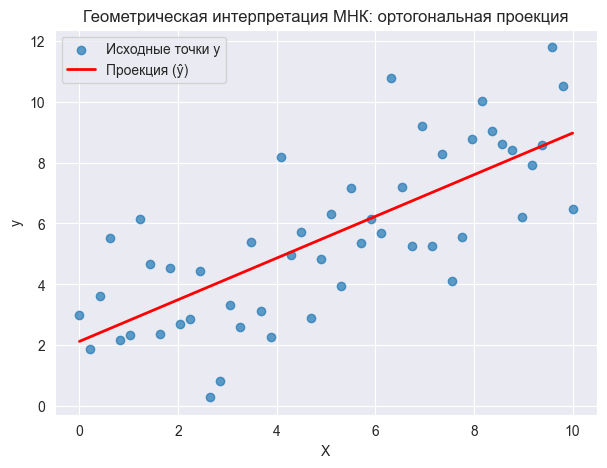

In [8]:
class ProjectionLeastSquares:
    """
    Геометрическая интерпретация метода наименьших квадратов.
    Находит проекцию вектора y на подпространство, порождённое столбцами X.
    """

    def __init__(self, X, y):
        # Добавляем столбец единиц, если его нет
        if not np.allclose(X[:, 0], 1):
            X = np.column_stack([np.ones(len(X)), X])
        self.X = X
        self.y = y.reshape(-1, 1)
        self.beta = None
        self.y_hat = None
        self.H = None  # матрица проекции
        self.residuals = None

    def fit(self):
        """
        Находит β и матрицу проекции H = X(XᵀX)^(-1)Xᵀ.
        """
        XtX_inv = np.linalg.inv(self.X.T @ self.X)
        self.beta = XtX_inv @ self.X.T @ self.y
        self.H = self.X @ XtX_inv @ self.X.T       # матрица проекции
        self.y_hat = self.H @ self.y                # проекция y на Col(X)
        self.residuals = self.y - self.y_hat
        return self

    def check_orthogonality(self, tol=1e-10):
        """
        Проверяет, что Xᵀe ≈ 0 (остатки ортогональны подпространству).
        """
        return np.allclose(self.X.T @ self.residuals, np.zeros((self.X.shape[1], 1)), atol=1e-10)

    def plot_projection(self):
        """
        Визуализирует истинный y и его проекцию (только если X одномерный).
        """
        if self.X.shape[1] != 2:
            print("Визуализация доступна только при одном признаке.")
            return
        plt.figure(figsize=(7,5))
        plt.scatter(self.X[:,1], self.y, label="Исходные точки y", alpha=0.7)
        plt.plot(self.X[:,1], self.y_hat, color='red', lw=2, label="Проекция (ŷ)")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("Геометрическая интерпретация МНК: ортогональная проекция")
        plt.legend()
        plt.grid(True)
        plt.show()

    def summary(self):
        print("Оценённые коэффициенты β:\n", self.beta.flatten())
        print("\nПроверка ортогональности: ", self.check_orthogonality())
        print("\nМатрица проекции H:\n", np.round(self.H[:5,:5], 3), "...")


# === Пример использования ===

# 1. Генерируем синтетические данные
np.random.seed(42)
n = 50
X = np.linspace(0, 10, n).reshape(-1, 1)
true_beta = np.array([[2.0], [0.8]])
y = true_beta[0] + true_beta[1]*X + np.random.normal(0, 2, size=(n,1))

# 2. Обучаем модель
proj_model = ProjectionLeastSquares(X, y).fit()
proj_model.summary()

# 3. Визуализируем
proj_model.plot_projection()


# 5. Что делать, если ($X^T X$) необратима (коллинеарность)? — псевдообратная и численные методы

Если столбцы ($X$) линейно зависимы, то ($X^T X$) сингулярна и ($(X^T X)^{-1}$) не существует. В таких случаях:

1. **Псевдообратная Мура-Пенроуза**:
   $$
   \boldsymbol{\beta}_{\text{LS}} = X^{+} \mathbf{y},
   $$
   где ($X^{+}$) — псевдообратная (получается через SVD). Это даёт одно корректное минимально-нормальное решение.

2. **Регуляризация (Ridge)** — добавляем ($\lambda I$):
   $$
   \boldsymbol{\beta}_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T y,
   $$
   что стабилизирует вычисления и устраняет проблему обращения.

3. **Численные методы**, которые на практике предпочтительнее прямого обращения:

   * Решать нормальные уравнения через **QR-разложение** (решается без обращения $(X^T X)$).
   * Или использовать **SVD** (устойчиво к вырожденности).

Практическая рекомендация: **не вычислять** явно ($(X^T X)^{-1}$) если можно — лучше `numpy.linalg.lstsq`, QR или SVD.

---

# 6. Дополнительные полезные формулы и интерпретации

* **Матрица проекции (hat matrix)**:
  $$
  H = X (X^T X)^{-1} X^T,\qquad \hat{y} = H y.
  $$
  Она проецирует ($y$) в колонное пространство ($X$). ($H$) симметрична и идемпотентна (($H^2=H$)).

* **Остатки** ($\mathbf{e} = y - \hat{y}$) удовлетворяют ($\mathbf{X}^T \mathbf{e} = 0$).

* **Дисперсия оценок** (при предположении ($\mathrm{Var}(\varepsilon)=\sigma^2 I$)):
  $$
  \mathrm{Var}(\hat{\boldsymbol{\beta}})=\sigma^2 (X^T X)^{-1}.
  $$
  (Отсюда доверительные интервалы и t-тесты в классической регрессии.)
